# Ml Practical Assignment

1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the diamonds dataset
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# we dont want categorical columns for this
df = df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].dropna()


In [4]:
df

,carat,depth,table,x,y,z,price
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,61.0,58.0,6.15,6.12,3.74,2757


In [5]:
X = df.drop(columns="price")
X

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [6]:
y = df["price"]

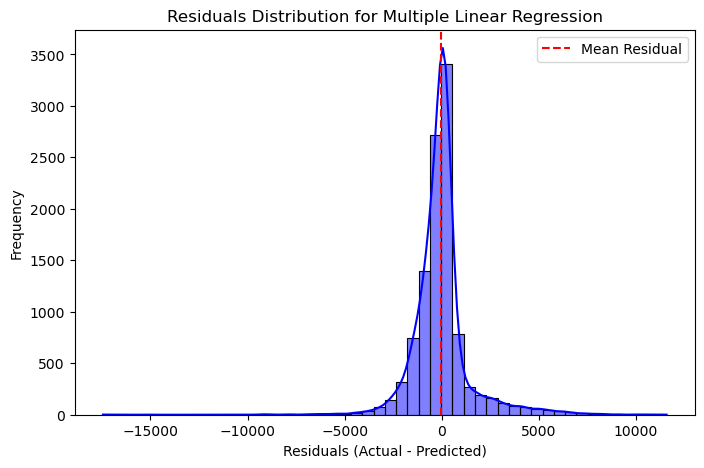

Mean Absolute Error: 888.48


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
ypred = model.predict(X_test)
# Compute residuals (errors)
residuals = y_test - ypred

# Visualize residuals distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True, color="blue")
plt.axvline(residuals.mean(), color='red', linestyle='dashed', label='Mean Residual')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution for Multiple Linear Regression")
plt.legend()
plt.show()

# Print Mean Absolute Error (for reference)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, ypred):.2f}")


2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,ypred)
mse = mean_squared_error(y_test,ypred)
rmse = mse**0.5
print(f"Mean Absolute Error of the diamond model is: {mae:.2f}")
print(f"Mean Squared Error of the diamond model is: {mse:.2f}")
print(f"Root Mean Squared Error of the diamond model is: {rmse:.2f}")

Mean Absolute Error of the diamond model is: 888.48
Mean Squared Error of the diamond model is: 2242178.90
Root Mean Squared Error of the diamond model is: 1497.39


3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

In [9]:
# y_test = np.array(y_test).reshape(-1,1)
# X_test.shape
# ypred = np.array(ypred).reshape(-1,1)

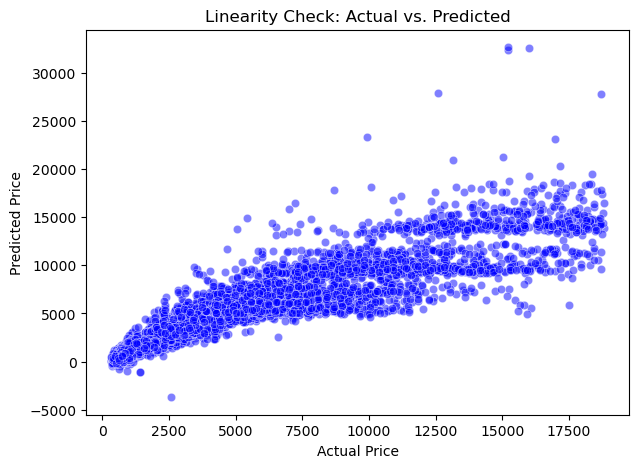

In [10]:
# to check linearity
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=ypred, alpha=0.5, color="blue")
# plt.plot(y_test, ypred, alpha=0.5, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linearity Check: Actual vs. Predicted")
# plt.axline([0, 0], slope=1, color="red", linestyle="dashed")  # 45-degree reference line
plt.show()

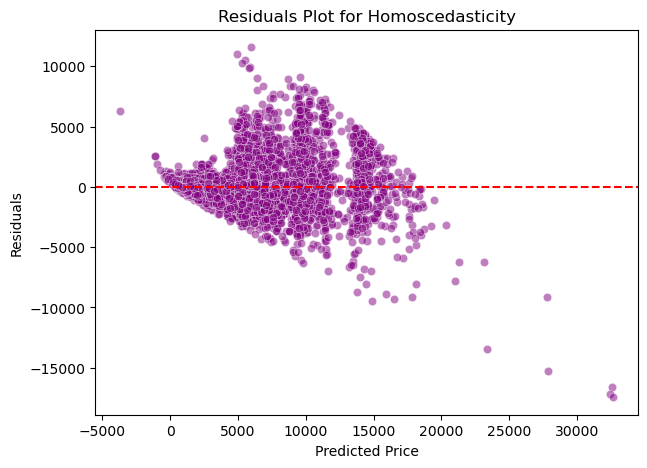

In [11]:
# homoscedasticity
plt.figure(figsize=(7, 5))
sns.scatterplot(x=ypred, y=residuals, alpha=0.5, color="purple")
plt.axhline(0, color='red', linestyle="dashed")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Homoscedasticity")
plt.show()

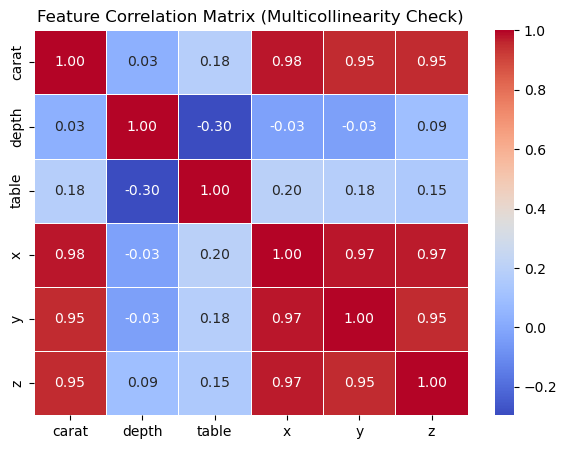

In [12]:
# Multicollinearity --> as it is >0.75 hence features are highly correlated
plt.figure(figsize=(7, 5))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix (Multicollinearity Check)")
plt.show()

5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

Coefficient of the model is 7768.9105
Intercept of the model is -2261.91
R² Score of the model is 0.8489


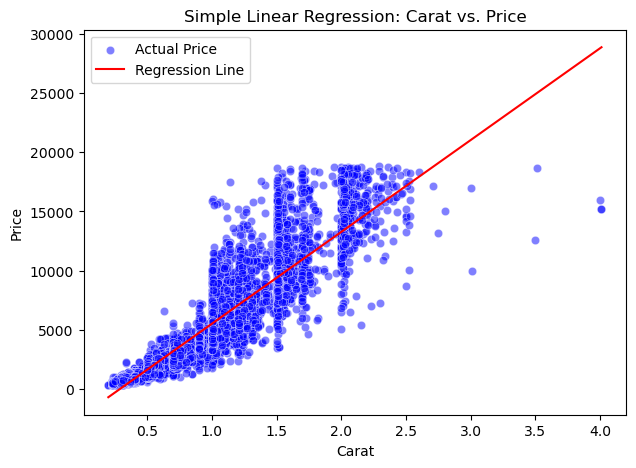

In [13]:
# we already have a diamond dataset model

from sklearn.metrics import r2_score

# Load the diamonds dataset
df = sns.load_dataset("diamonds")

# Selecting the required columns
X = df[['carat']]  # Feature
y = df['price']    # Target variable

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
coefficient_of_diamond = model.coef_[0]  # Slope
intercept_of_diamond_model = model.intercept_  # Intercept

# Predict on test set
y_pred = model.predict(X_test)

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Print model details
print(f"Coefficient of the model is {coefficient_of_diamond:.4f}")
print(f"Intercept of the model is {intercept_of_diamond_model:.2f}")
print(f"R² Score of the model is {r2:.4f}")

# Visualizing the Regression Line
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_test['carat'], y=y_test, alpha=0.5, color="blue", label="Actual Price")
sns.lineplot(x=X_test['carat'], y=y_pred, color="red", label="Regression Line")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Carat vs. Price")
plt.legend()
plt.show()



6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

Coefficient (Slope) of the model: 0.11
Intercept of the model: 0.93
R² Score of the model: 0.5449


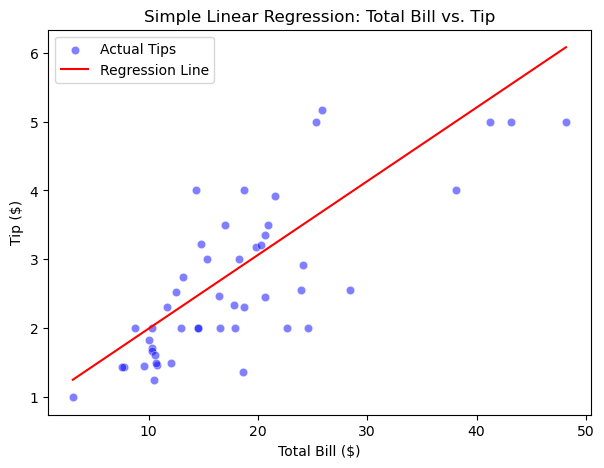

In [14]:


# Load the tips dataset
df = sns.load_dataset("tips")

# Selecting the required columns
X = df[['total_bill']]  # Feature
y = df['tip']  # Target variable

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
coefficient = model.coef_[0]
# Slope
intercept = model.intercept_  # Intercept

# Predict on test set
y_pred = model.predict(X_test)

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Print model details
print(f"Coefficient (Slope) of the model: {coefficient:.2f}")
print(f"Intercept of the model: {intercept:.2f}")
print(f"R² Score of the model: {r2:.4f}")

# Visualizing the Regression Line
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_test['total_bill'], y=y_test, alpha=0.5, color="blue", label="Actual Tips")
sns.lineplot(x=X_test['total_bill'], y=y_pred, color="red", label="Regression Line")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.title("Simple Linear Regression: Total Bill vs. Tip")
plt.legend()
plt.show()


7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

Coefficient (Slope) of the model: 2.80
Intercept of the model: 4.14


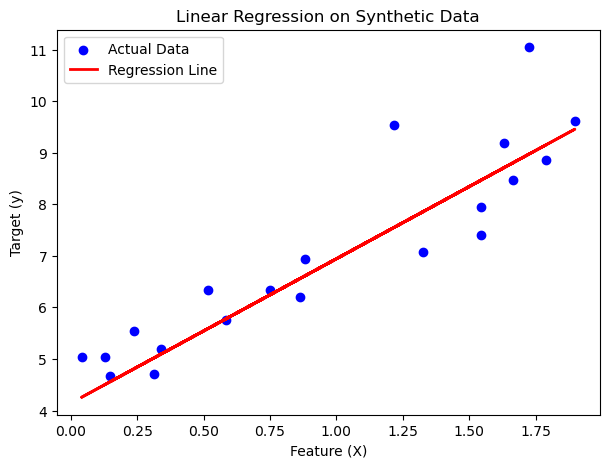

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random values for feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear equation: y = 4 + 3X + noise

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get model parameters
coefficient = model.coef_[0][0] # Extract the coefficient
intercept = model.intercept_[0]  # Extract the intercept

# Print model details
print(f"Coefficient (Slope) of the model: {coefficient:.2f}")
print(f"Intercept of the model: {intercept:.2f}")

# Visualization
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.show()


8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [16]:
import pickle
with open("linear_model.pkl", "wb") as file:
    pickle.dump(model, file)
print("Model is saved successfully to linear_model.pkl")


Model is saved successfully to linear_model.pkl


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

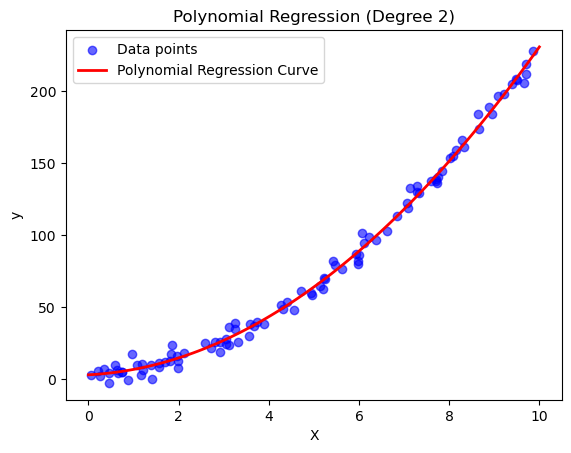

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 2 * X**2 + 3 * X + np.random.randn(100, 1) * 5  # Quadratic equation with noise

# 2. Transform X for Polynomial Regression (Degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X) # Adds x^2 as a new feature

# 3. Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# 4. Generate Predictions for Plot
X_range = np.linspace(0, 10, 100).reshape(-1, 1)  # Smooth range for curve
X_range_poly = poly_features.transform(X_range)
y_pred = model.predict(X_range_poly)

# 5. Plot the Regression Curve
plt.scatter(X, y, label="Data points", color="blue", alpha=0.6)
plt.plot(X_range, y_pred, label="Polynomial Regression Curve", color="red", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression (Degree 2)")
plt.show()

11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

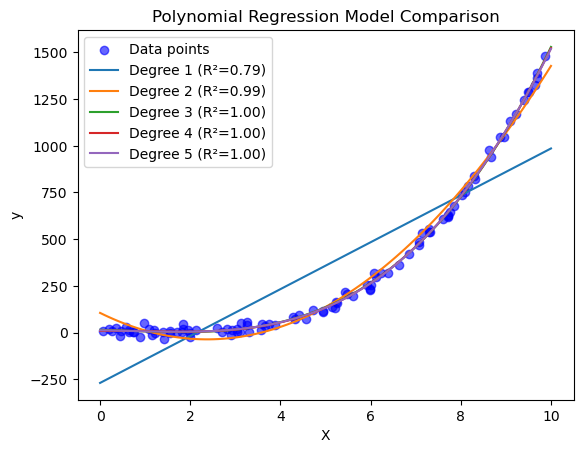

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 1. Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 2 * X**3 - 5 * X**2 + 3 * X + np.random.randn(100, 1) * 20  # Cubic equation with noise

# 2. Define Degrees for Comparison
degrees = [1, 2, 3, 4, 5]

plt.scatter(X, y, label="Data points", color="blue", alpha=0.6)

# 3. Train and Compare Polynomial Models
X_range = np.linspace(0, 10, 100).reshape(-1, 1)  # Smooth range for curve

for degree in degrees:
    # Transform features for Polynomial Regression
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict on the training set
    y_pred_train = model.predict(X_poly)
    
    # Predict on smooth X range for plotting
    X_range_poly = poly_features.transform(X_range)
    y_pred_curve = model.predict(X_range_poly)
    
    # Calculate R² Score
    r2 = r2_score(y, y_pred_train)
    
    # Plot the regression curve
    plt.plot(X_range, y_pred_curve, label=f"Degree {degree} (R²={r2:.2f})")

# 4. Final Plot Formatting
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Model Comparison")
plt.show()


12. Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [19]:

# 1. Generate Synthetic Data (2 Features)
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # First feature (random values between 0 and 10)
X2 = np.random.rand(100, 1) * 5   # Second feature (random values between 0 and 5)
y = 4 * X1 + 2 * X2 + np.random.randn(100, 1) * 5  # Linear relation with noise

# Combine features into a single array
X = np.hstack((X1, X2))  # Shape: (100, 2)

# 2. Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict and Calculate R² Score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# 5. Print Model Details
print(f"Coefficients: {model.coef_.flatten()}")  # Flatten to display as 1D
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"R² Score: {r2:.4f}")


Coefficients: [3.87501104 2.78717374]
Intercept: -1.03
R² Score: 0.9014


14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
# sample data
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Feature3': [5, 3, 6, 2, 7, 1, 8, 4, 9, 0],
    'Feature4': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3,Feature4
0,1,2,5,10
1,2,4,3,20
2,3,6,6,30
3,4,8,2,40
4,5,10,7,50
5,6,12,1,60
6,7,14,8,70
7,8,16,4,80
8,9,18,9,90
9,10,20,0,100


In [ ]:
scale = StandardScaler()
df_scaled = pd.DataFrame(scale.fit_transform(df),columns=df.columns)
# calculate vif
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(df_scaled.columns))]

# Display VIF values
print(vif_data)
# by the output we can say that the features are highly correlated to each other

    Feature       VIF
0  Feature1       inf
1  Feature2       inf
2  Feature3  1.000037
3  Feature4       inf


c:\Users\smdta\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.
17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

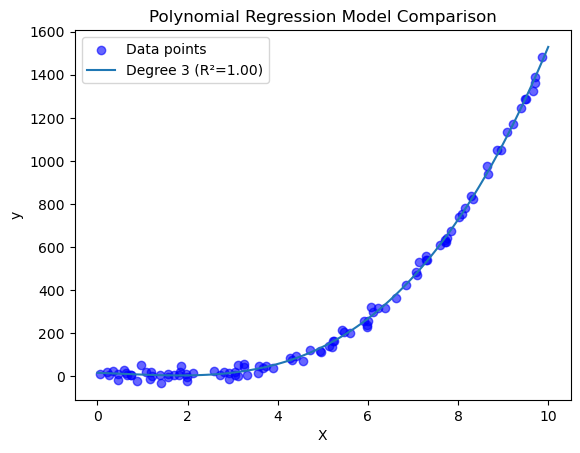

In [23]:
# 1. Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 2 * X**3 - 5 * X**2 + 3 * X + np.random.randn(100, 1) * 20  # Cubic equation with noise

# 2. Define Degrees for Comparison

plt.scatter(X, y, label="Data points", color="blue", alpha=0.6)

# 3. Train and Compare Polynomial Models
X_range = np.linspace(0, 10, 100).reshape(-1, 1)  # Smooth range for curve


# Transform features for Polynomial Regression
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict on the training set
y_pred_train = model.predict(X_poly)

# Predict on smooth X range for plotting
X_range_poly = poly_features.transform(X_range)
y_pred_curve = model.predict(X_range_poly)

# Calculate R² Score
r2 = r2_score(y, y_pred_train)

# Plot the regression curve
plt.plot(X_range, y_pred_curve, label=f"Degree 3 (R²={r2:.2f})")

# 4. Final Plot Formatting
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Model Comparison")
plt.show()

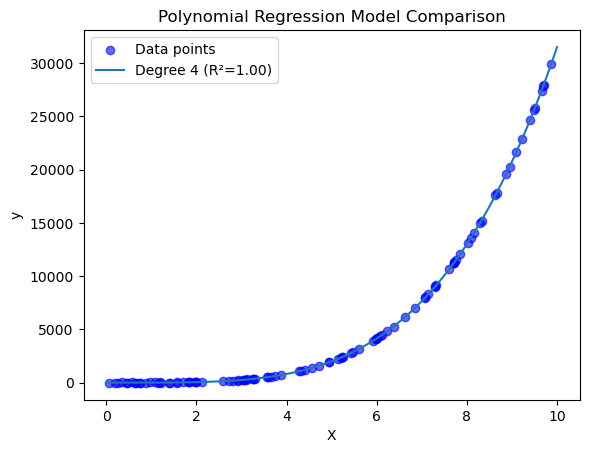

In [24]:
# 1. Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 3* X**4 + 2 * X**3 - 5 * X**2 + 3 * X + np.random.randn(100, 1) * 20  # Cubic equation with noise

# 2. Define Degrees for Comparison

plt.scatter(X, y, label="Data points", color="blue", alpha=0.6)

# 3. Train and Compare Polynomial Models
X_range = np.linspace(0, 10, 100).reshape(-1, 1)  # Smooth range for curve


# Transform features for Polynomial Regression
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict on the training set
y_pred_train = model.predict(X_poly)

# Predict on smooth X range for plotting
X_range_poly = poly_features.transform(X_range)
y_pred_curve = model.predict(X_range_poly)

# Calculate R² Score
r2 = r2_score(y, y_pred_train)

# Plot the regression curve
plt.plot(X_range, y_pred_curve, label=f"Degree 4 (R²={r2:.2f})")

# 4. Final Plot Formatting
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Model Comparison")
plt.show()

19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

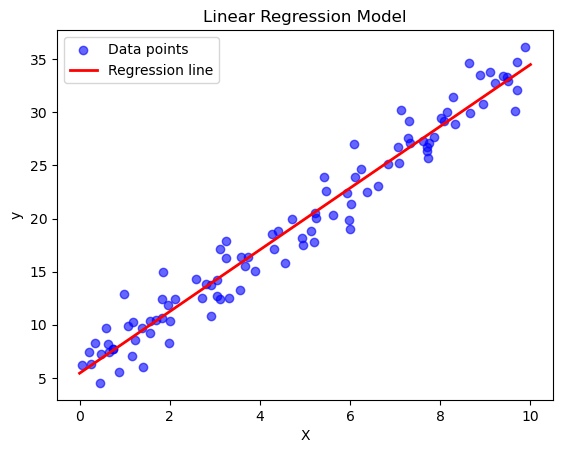

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 3 * X + 5 + np.random.randn(100, 1) * 2  # Linear relation with noise

# 2. Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# 3. Predict values for plotting the regression line
X_range = np.linspace(0, 10, 100).reshape(-1, 1)  # Smooth range
y_pred = model.predict(X_range)

# 4. Plot Data Points and Regression Line
plt.scatter(X, y, color="blue", alpha=0.6, label="Data points")
plt.plot(X_range, y_pred, color="red", linewidth=2, label="Regression line")

# 5. Labels and Legend
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Model")
plt.legend()
plt.show()


20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Generate Synthetic Data
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # Feature 1
X2 = np.random.rand(100, 1) * 5   # Feature 2
X3 = np.random.rand(100, 1) * 20  # Feature 3

# Create a linear relationship: y = 4X1 + 3X2 - 2X3 + 10 + noise
y = 4 * X1 + 3 * X2 - 2 * X3 + 10 + np.random.randn(100, 1) * 5

# Combine features into a single dataset
X = np.hstack((X1, X2, X3))  # Shape: (100, 3)

# 2. Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# 3. Predict and Calculate R² Score
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# 4. Print Results
print(f"R-squared Score: {r2:.4f}")
print("Model Coefficients:", model.coef_.flatten())
print("Intercept:", model.intercept_[0])


R-squared Score: 0.9332
Model Coefficients: [ 4.20796463  3.20854972 -1.91766295]
Intercept: 7.9998606151389655


21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [28]:
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
y = 3 * X + 5 + np.random.randn(100, 1) * 2  # Linear relation with noise

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Save the Model using joblib
joblib.dump(model, "linear_regression_model.pkl")
print("Model saved successfully!")

# 5. Load the Model
loaded_model = joblib.load("linear_regression_model.pkl")
print("Model loaded successfully!")

# 6. Make Predictions with the Loaded Model
y_pred = loaded_model.predict(X_test)

# 7. Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score of Loaded Model: {r2:.4f}")


Model saved successfully!
Model loaded successfully!
R-squared Score of Loaded Model: 0.9686


22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first",sparse_output=False)
df = sns.load_dataset("tips")
df_cat = df.select_dtypes(include="category")
encoded_arr = ohe.fit_transform(df_cat)
encoded_df = pd.DataFrame(encoded_arr,columns=ohe.get_feature_names_out(df_cat.columns))
encoded_df


,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
239,1.0,0.0,1.0,0.0,0.0,0.0
240,0.0,1.0,1.0,0.0,0.0,0.0
241,1.0,1.0,1.0,0.0,0.0,0.0
242,1.0,0.0,1.0,0.0,0.0,0.0


23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

Linear Regression Coefficients: [ 4.78577712 -3.16889559  1.80127673]
Ridge Regression Coefficients: [ 4.69499276 -3.12080891  1.77741828]

Linear Regression R² Score: 0.9530830423429073
Ridge Regression R² Score: 0.9527591464673092


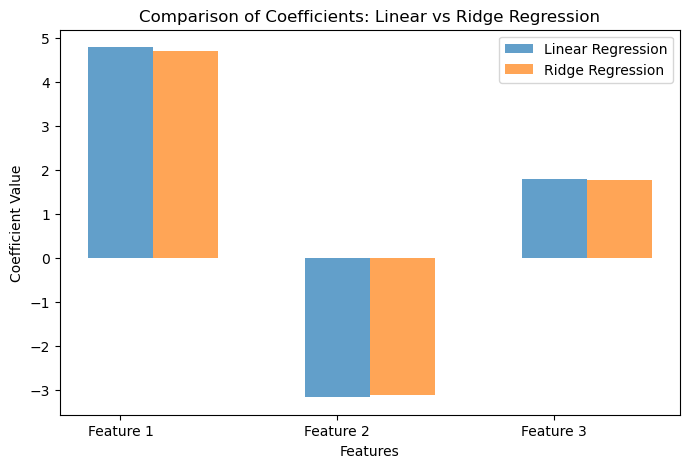

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate Synthetic Data
np.random.seed(42)
X = np.random.randn(100, 3)  # 100 samples, 3 features
true_coeffs = np.array([5, -3, 2])  # True coefficients
y = X @ true_coeffs + np.random.randn(100) * 2  # Adding noise

# Step 2: Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Step 4: Train Ridge Regression Model
ridge_reg = Ridge(alpha=1)  # Alpha = Regularization strength
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Step 5: Print Coefficients & R² Scores
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Ridge Regression Coefficients:", ridge_reg.coef_)
print("\nLinear Regression R² Score:", r2_score(y_test, y_pred_lin))
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))

# Step 6: Plot Comparison of Coefficients
plt.figure(figsize=(8, 5))
plt.bar(range(3), lin_reg.coef_, width=0.3, label="Linear Regression", alpha=0.7)
plt.bar(np.array(range(3)) + 0.3, ridge_reg.coef_, width=0.3, label="Ridge Regression", alpha=0.7)
plt.xticks(range(3), [f"Feature {i+1}" for i in range(3)])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend()
plt.title("Comparison of Coefficients: Linear vs Ridge Regression")
plt.show()


24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score

# Step 1: Generate Synthetic Data
np.random.seed(42)
X = np.random.randn(100, 3)  # 100 samples, 3 features
true_coeffs = np.array([5, -3, 2])  # True coefficients
y = X @ true_coeffs + np.random.randn(100) * 2  # Adding noise

# Step 2: Define the Linear Regression Model
model = LinearRegression()

# Step 3: Set up Cross-Validation (K-Fold with k=5)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Perform Cross-Validation
r2_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(r2_score))

# Step 5: Print the Results
print("R² Scores for each fold:", r2_scores)
print("Mean R² Score:", np.mean(r2_scores))
print("Standard Deviation of R² Scores:", np.std(r2_scores))


R² Scores for each fold: [0.95308304 0.86347385 0.88757703 0.90878447 0.74675033]
Mean R² Score: 0.8719337445415883
Standard Deviation of R² Scores: 0.06918143502749687


25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

0.7928935346451236
0.9907782115221277
0.9982256939903106
0.9982461973978741
0.9982509395900959


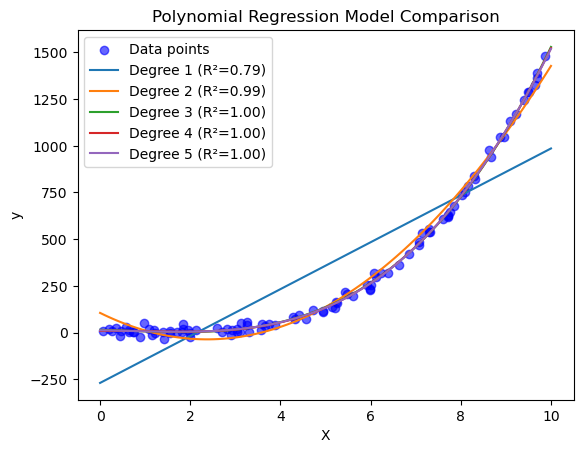

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 1. Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 2 * X**3 - 5 * X**2 + 3 * X + np.random.randn(100, 1) * 20  # Cubic equation with noise

# 2. Define Degrees for Comparison
degrees = [1, 2, 3, 4, 5]

plt.scatter(X, y, label="Data points", color="blue", alpha=0.6)

# 3. Train and Compare Polynomial Models
X_range = np.linspace(0, 10, 100).reshape(-1, 1)  # Smooth range for curve

for degree in degrees:
    # Transform features for Polynomial Regression
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict on the training set
    y_pred_train = model.predict(X_poly)
    
    # Predict on smooth X range for plotting
    X_range_poly = poly_features.transform(X_range)
    y_pred_curve = model.predict(X_range_poly)
    
    # Calculate R² Score
    r2 = r2_score(y, y_pred_train)
    print(r2)
    
    # Plot the regression curve
    plt.plot(X_range, y_pred_curve, label=f"Degree {degree} (R²={r2:.2f})")

# 4. Final Plot Formatting
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Model Comparison")
plt.show()
